#Dataset sourced from - https://data.mendeley.com/datasets/wkjdmrmrg4/4

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_excel("CodebookData_SEMPLS_IBB.xlsx", sheet_name = "Data View")

In [109]:
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'E-Paylater User Status': 'BNPL',
    'IBB1: I do most of my online shopping spontaneously.': 'ImpulsiveBuying',
    'SC3: I do things that feel good at the moment but regret later.': 'Regret'
})

In [111]:
df['BNPL'] = df['BNPL'].map({1: 'User', 2:'Non-User'})
df = df[['BNPL', 'ImpulsiveBuying', 'Regret']].dropna()

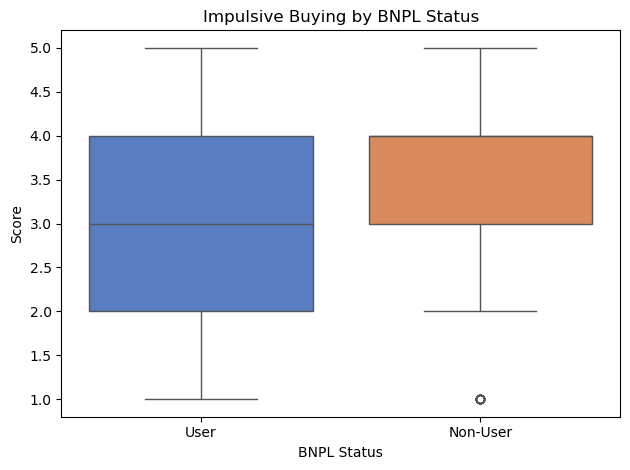

In [131]:
sns.boxplot(x='BNPL', y='ImpulsiveBuying',hue='BNPL',  data=df, palette='muted', legend = False)
plt.title('Impulsive Buying by BNPL Status')
plt.ylabel('Score')
plt.xlabel('BNPL Status')
plt.tight_layout()
plt.savefig("Impulsive Buying by BNPL Status.png")
plt.show()

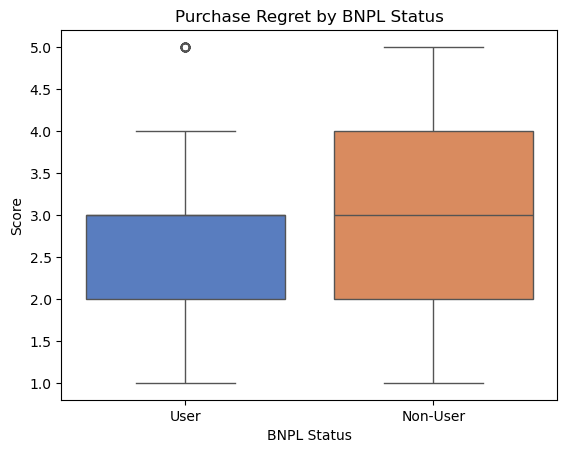

In [133]:
sns.boxplot(x='BNPL', y='Regret', hue='BNPL', data=df, palette='muted', legend = False)
plt.title('Purchase Regret by BNPL Status')
plt.ylabel('Score')
plt.xlabel('BNPL Status')
plt.savefig("Purchase Regret by BNPL Status.png")
plt.show()

In [119]:
summary = df.groupby("BNPL")[["ImpulsiveBuying", "Regret"]].mean().round(2)
print(summary)

          ImpulsiveBuying  Regret
BNPL                             
Non-User             3.29    2.88
User                 2.97    2.79
